# Lab 10: Association Rules Mining - Market Basket Analysis

**Course:** COMPX310 - Machine Learning  
**Worth:** 3% 

---

**Student Name:** Guo Zimo <br>
**Student ID:**  20233006327 <br>
**Partner Name (if applicable):**  
**Partner ID (if applicable):**  

---

**Note:** This lab is designed to introduce you to Association Rules BEFORE the theory lecture. Don't worry if some concepts are new - we'll explain everything step by step! 🚀

---

## Learning Objectives
By the end of this lab, you will be able to:
1. Understand the concept of Association Rules Mining
2. Apply Apriori algorithm to discover frequent itemsets
3. Generate and interpret association rules
4. Visualize patterns in transactional data

---

## 1. Introduction to Association Rules Mining

### What is Association Rules Mining?

**Association Rules Mining** is an unsupervised learning technique used to discover interesting relationships between variables in large databases. It is commonly used in **Market Basket Analysis** to find items that frequently appear together in transactions.

### Real-World Example:
Imagine you own a grocery store. You notice that customers who buy **bread** often also buy **butter**. This knowledge can help you:
- Place these items near each other in the store
- Create bundle offers (Buy bread + butter together and save 10%)
- Plan inventory better
- Design targeted marketing campaigns

### Key Terminologies:

1. **Itemset**: A collection of one or more items
   - Example: {milk, bread, butter}

2. **Transaction**: A single purchase event containing multiple items
   - Example: Customer A bought {milk, bread, eggs}

3. **Support**: How frequently an itemset appears in the dataset
   - Formula: Support(A) = (Transactions containing A) / (Total transactions)
   - Example: If bread appears in 100 out of 1000 transactions, support = 0.10 or 10%

4. **Confidence**: The likelihood that item B is purchased when item A is purchased
   - Formula: Confidence(A → B) = Support(A and B) / Support(A)
   - Example: If 80% of people who buy bread also buy butter, confidence = 0.80

5. **Lift**: Measures how much more often A and B occur together than expected if they were independent
   - Formula: Lift(A → B) = Support(A and B) / (Support(A) × Support(B))
   - Lift > 1: Items are positively correlated (likely to be bought together)
   - Lift = 1: Items are independent
   - Lift < 1: Items are negatively correlated (unlikely to be bought together)

6. **Association Rule**: A rule of the form A → B
   - Example: {bread, butter} → {milk}
   - Interpretation: "If a customer buys bread and butter, they are likely to buy milk"

---

## 2. Apriori Algorithm

### What is Apriori?

The **Apriori algorithm** is a classic algorithm used to mine frequent itemsets and generate association rules. The name "Apriori" comes from the fact that the algorithm uses **prior knowledge** of frequent itemset properties.

### How Apriori Works:

1. **Step 1**: Find all frequent itemsets (itemsets that appear more than a minimum support threshold)
2. **Step 2**: Generate association rules from these frequent itemsets
3. **Step 3**: Filter rules based on minimum confidence threshold

### Key Principle:
**Apriori Property**: If an itemset is frequent, then all of its subsets must also be frequent.

**Example**: If {bread, butter, milk} is frequent, then {bread, butter}, {bread, milk}, and {butter, milk} must also be frequent.

---

## 3. ECLAT Algorithm

### What is ECLAT?

**ECLAT** (Equivalence Class Clustering and bottom-up Lattice Traversal) is another algorithm for mining frequent itemsets. It is often **faster than Apriori** for certain types of datasets.

### How ECLAT Works:

Instead of using support counts, ECLAT uses **vertical data format** (transaction IDs for each item) and performs **intersection operations** to find frequent itemsets.

**Example**:
```
Horizontal Format (Traditional):
Transaction 1: {bread, milk}
Transaction 2: {bread, butter}
Transaction 3: {milk, butter}

Vertical Format (ECLAT):
bread: {1, 2}
milk: {1, 3}
butter: {2, 3}
```

---

## 4. Setup and Data Loading

### Required Libraries

In [1]:
# Install required libraries (run once)
!pip install mlxtend wordcloud networkx squarify

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ----------------------- ---------------- 0.8/1.4 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 5.3 MB/s  0:00:00

   -------------------------- ------------- 2/3 [mlxtend]
   -------------------------- ------------- 2/3 [mlxtend]
   ---------------------------------------- 3/3 [mlxtend]



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Import additional visualization libraries
from wordcloud import WordCloud
import networkx as nx
import squarify

# Set plot style
# plt.style.use('seaborn-darkgrid')
sns.set_style("darkgrid")
sns.set_palette("husl")

In [6]:
# Import association rules libraries
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

---

## Task 1: Load and Explore the Dataset

### Task 1.1: Load the Data

Load the `Market_Basket_Optimisation.csv` file. This file contains transaction data from a grocery store.

**Important Notes:**
- The CSV file has **no header row**
- Each row represents **one transaction**
- Items in a transaction are separated by commas
- Some transactions have fewer items than others (indicated by missing values)

**Hint**: Use `pd.read_csv()` with `header=None`

In [7]:
# TODO: Load the dataset
# data = pd.read_csv('___', header=___)

data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

### Task 1.2: Basic Data Exploration

Answer the following questions:
1. What is the shape of the dataset? How many transactions (rows) are there? What is the maximum number of items in a single transaction?
2. Display the first 10 transactions
3. Data types
4. Missing values per column

In [8]:
# TODO: Display basic information about the dataset

print("="*60)
print("DATASET INFORMATION")
print("="*60)

print(f"\n1. Shape of dataset: {data.shape}")
print(f"   - Number of transactions (rows): {data.shape[0]}")
print(f"   - Maximum items per transaction (columns): {data.shape[1]}")

print("\n2. First 10 transactions:")
print("-"*60)
display(data.head(10))

print("\n3. Data types:")
print(data.dtypes.value_counts())

print("\n4. Missing values per column:")
print(f"   Total missing values: {data.isna().sum().sum()}")


DATASET INFORMATION

1. Shape of dataset: (7501, 20)
   - Number of transactions (rows): 7501
   - Maximum items per transaction (columns): 20

2. First 10 transactions:
------------------------------------------------------------


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



3. Data types:
object    20
Name: count, dtype: int64

4. Missing values per column:
   Total missing values: 120657


### Task 1.3: Calculate Transaction Statistics

Calculate and display:
1. The **average number of items** per transaction
2. The **minimum and maximum** number of items in a transaction
3. Create a histogram showing the **distribution of transaction sizes**

**Hint**: For each row, count non-NaN values using `.count(axis=1)`

In [13]:
# TODO: Calculate transaction size statistics
# transaction_sizes = data.count(axis=1)

print("="*60)
print("TRANSACTION SIZE STATISTICS")
print("="*60)

transaction_sizes = data.count(axis=1)
print("The average number of items per transaction: ")
print(sum(transaction_sizes) / data.shape[0])
print("Maximum number of items: ")
print(max(transaction_sizes))
print("Minimum number of items: ")
print(min(transaction_sizes))

TRANSACTION SIZE STATISTICS
The average number of items per transaction: 
3.914544727369684
Maximum number of items: 
20
Minimum number of items: 
1


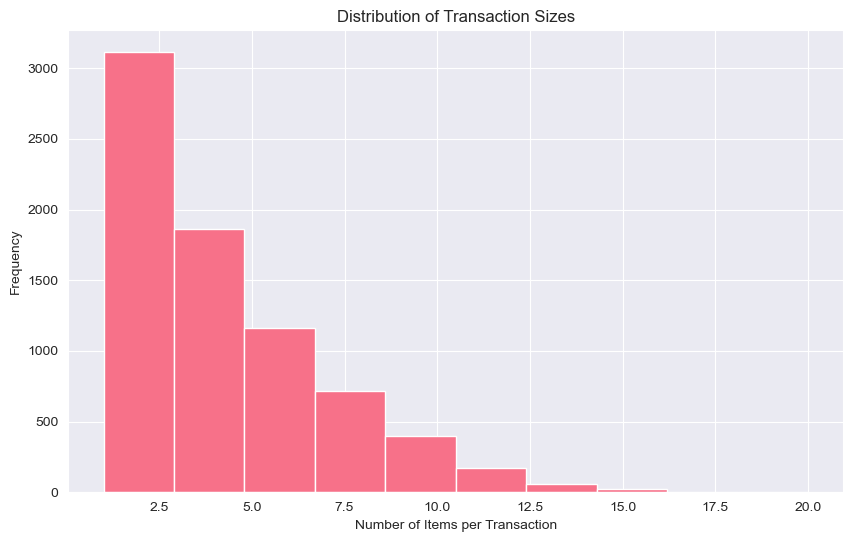

In [15]:
# TODO: Create a histogram of transaction sizes
plt.figure(figsize=(10, 6))
plt.hist(transaction_sizes)
plt.xlabel('Number of Items per Transaction')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Sizes')
plt.show()

### Task 1.4: Find Most Popular Items

Find and visualize the **top 20 most frequently purchased items**.

**Steps**:
1. Flatten all items from all transactions into a single list
2. Count the frequency of each item
3. Display the top 20 items
4. Create a bar chart visualization

**Hint**: Use `data.values.flatten()` to get all items, then use `Counter()` from collections

In [16]:
# TODO: Find the most popular items
# Step 1: Flatten all items (ignore NaN values)
all_items = data.values.flatten()
all_items = [item for item in all_items if pd.notna(item)]

# Step 2: Count frequencies
item_counts = Counter(all_items)

# Step 3: Get top 20
top_20 = item_counts.most_common(20)

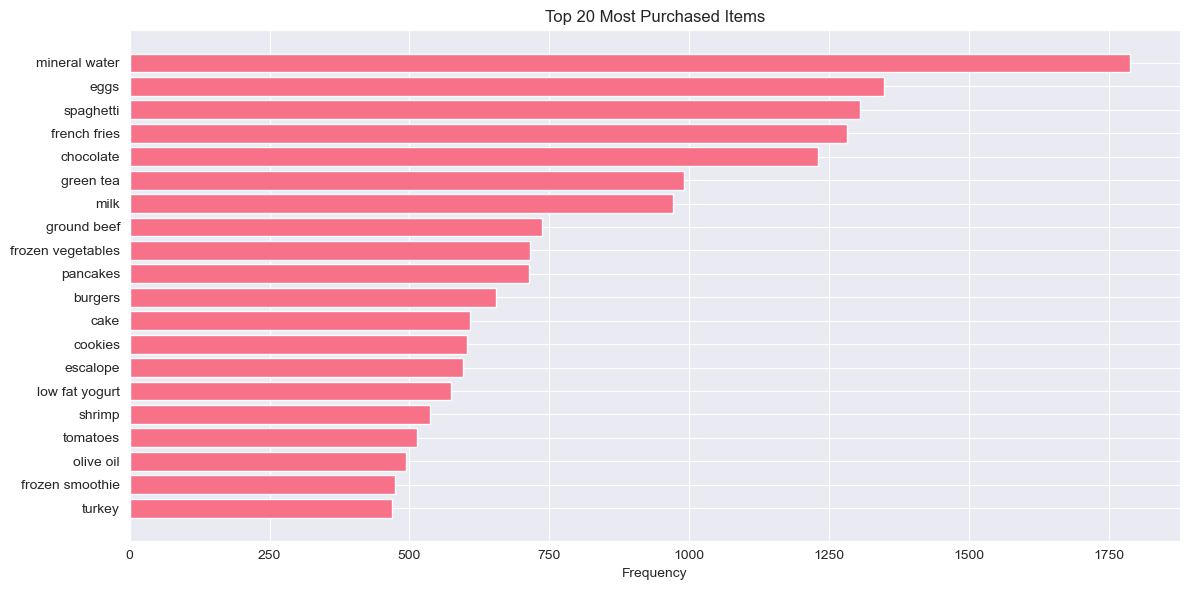

In [17]:
# TODO: Visualize top 20 items
items, counts = zip(*top_20)

plt.figure(figsize=(12, 6))
plt.barh(range(len(items)), counts)
plt.yticks(range(len(items)), items)
plt.xlabel('Frequency')
plt.title('Top 20 Most Purchased Items')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()


### Task 1.5: Word Cloud Visualization

A word cloud is a visual representation where the size of each word indicates its frequency. Larger words appear more frequently in the data. This gives us a quick visual understanding of the most popular items.

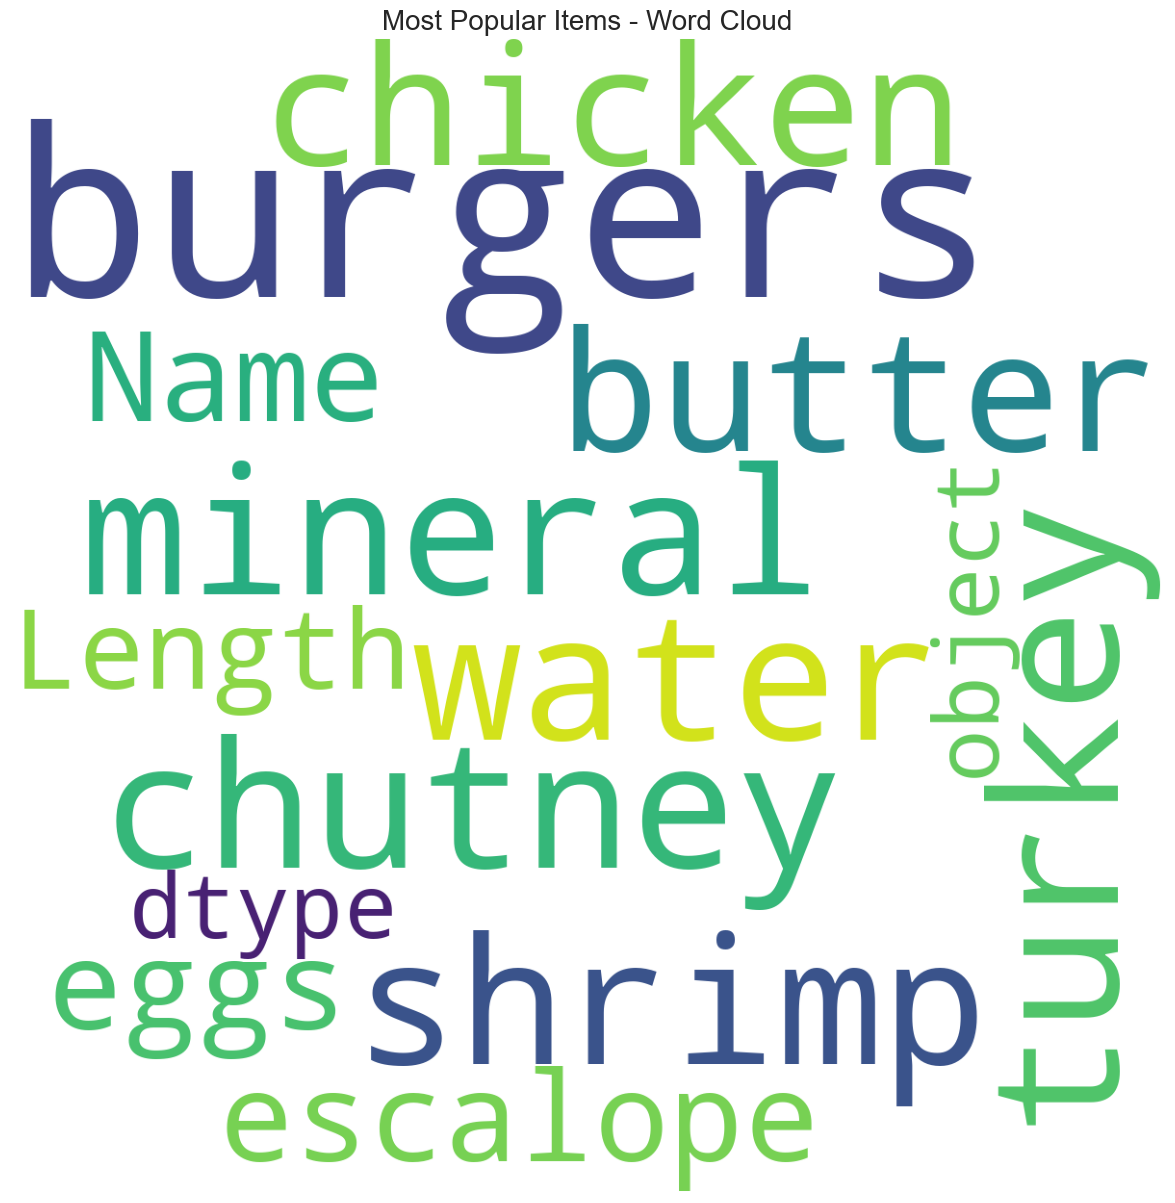

In [18]:
# TODO: Create Word Cloud of Popular Items
# Word clouds show item frequency visually - bigger words = more popular

# Set figure size for better visibility
plt.rcParams['figure.figsize'] = (15, 15)

# Create WordCloud object
# - background_color: background color of the image
# - width & height: dimensions of the image
# - max_words: maximum number of words to display
wordcloud = WordCloud(background_color='white', 
                      width=1200, 
                      height=1200, 
                      max_words=121).generate(str(data[0]))

# Display the word cloud
plt.imshow(wordcloud)
plt.axis('off')  # Hide axes
plt.title('Most Popular Items - Word Cloud', fontsize=20)
plt.show()

### Task 1.6: Tree Map Visualization

A **tree map** uses rectangles to represent data hierarchically. The **size of each rectangle** is proportional to the item's frequency. This makes it easy to compare relative frequencies at a glance.

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\squarify\__init__.py:174: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return list(sizes)
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\squarify\__init__.py:174: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return list(sizes)
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\squarify\__init__.py:174: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return list(sizes)
C:\Users\HP\AppData

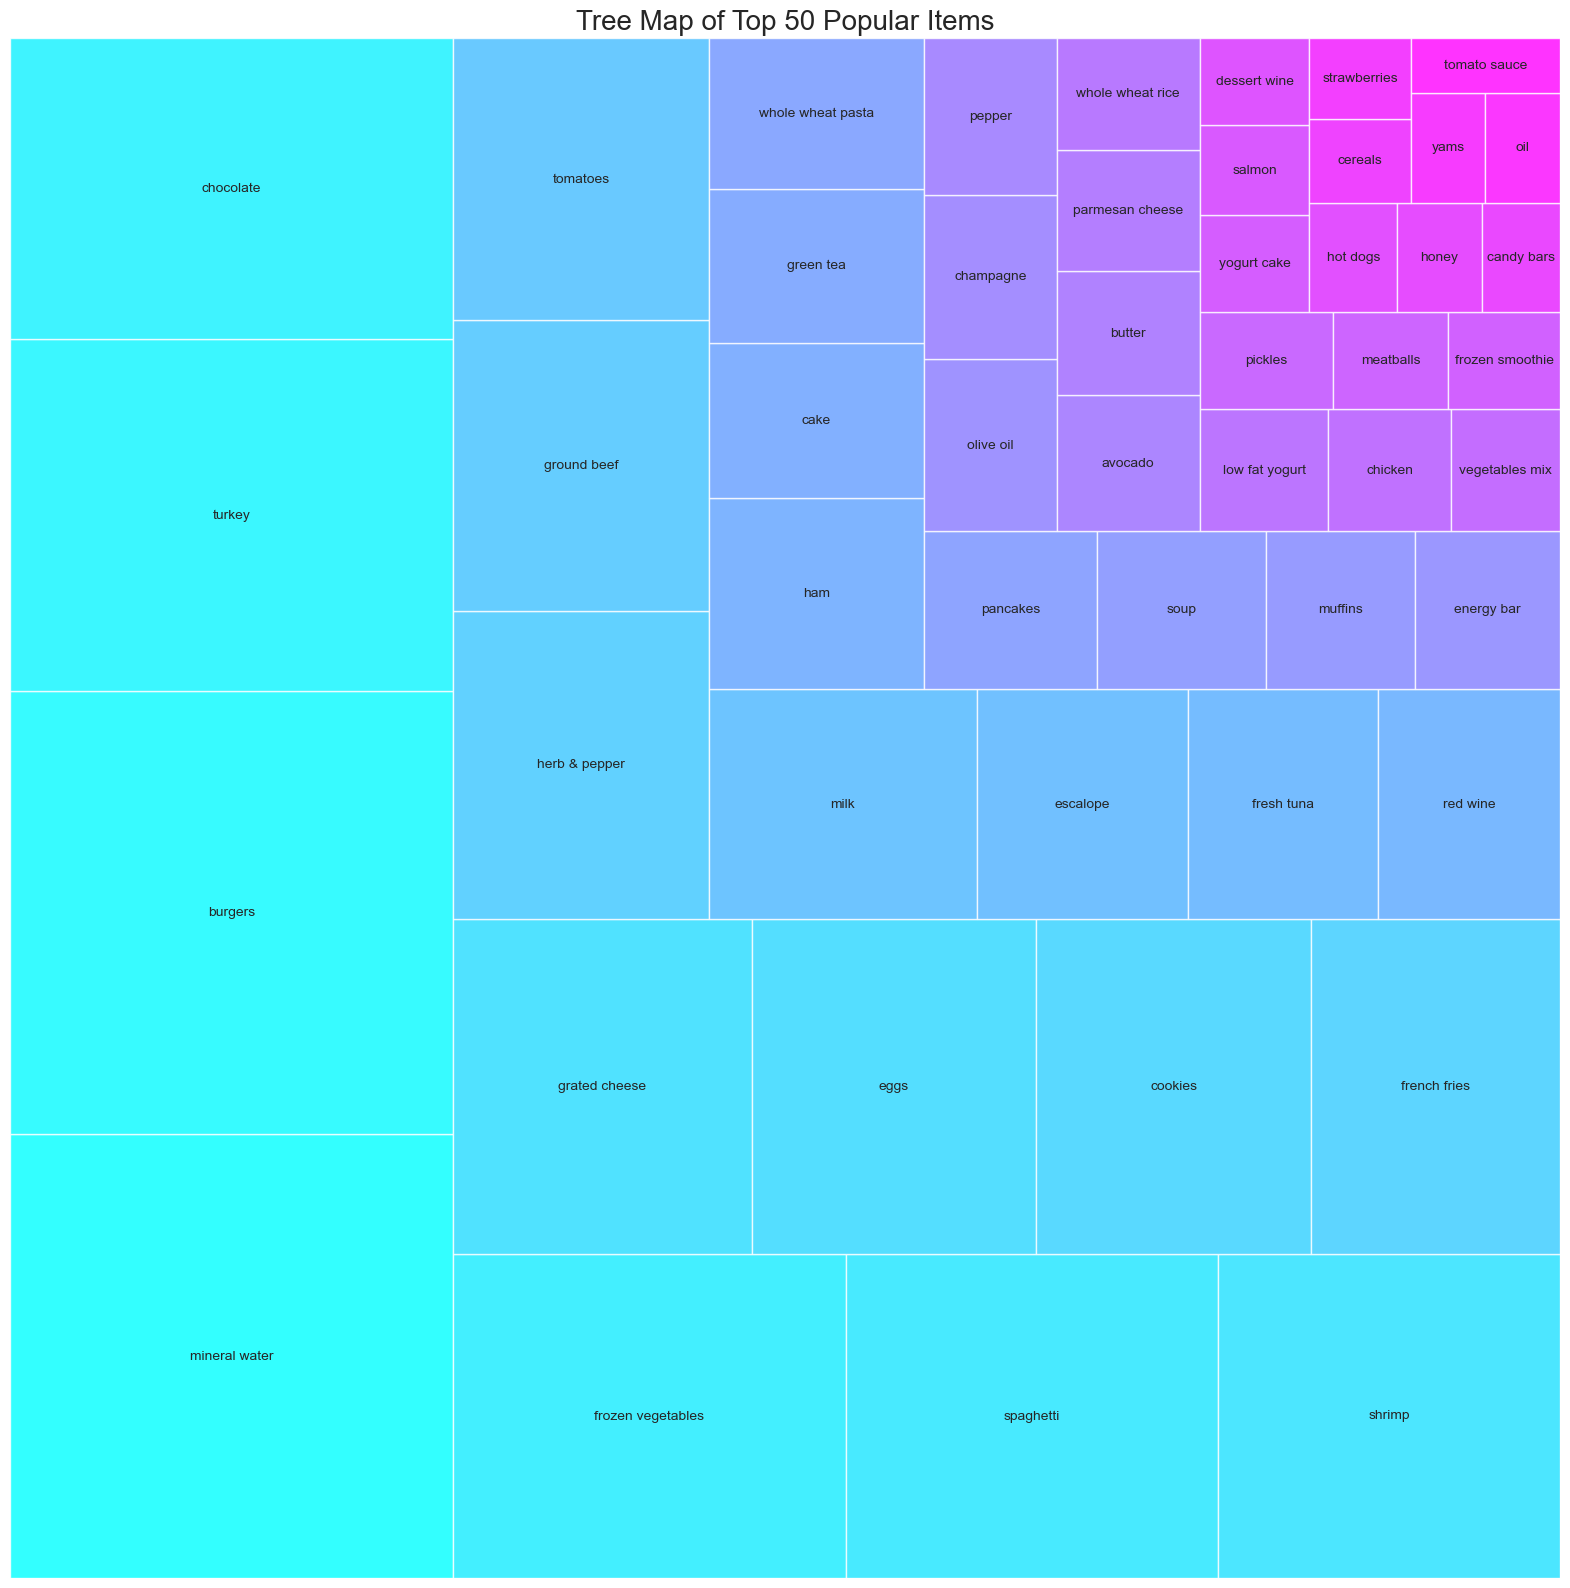

In [19]:
# TODO: Create Tree Map of Top 50 Items
# Tree maps show proportions - larger boxes = more popular items

# Get top 50 items and their frequencies
y = data[0].value_counts().head(50).to_frame()

# Set figure size
plt.rcParams['figure.figsize'] = (20, 20)

# Create color palette
color = plt.cm.cool(np.linspace(0, 1, 50))

# Plot tree map
# - sizes: determines rectangle size (based on frequency)
# - label: text to display in each rectangle
# - alpha: transparency (0.8 = 80% opaque)
# - color: colors for rectangles
squarify.plot(sizes=y.values, 
              label=y.index, 
              alpha=0.8, 
              color=color)

plt.title('Tree Map of Top 50 Popular Items', fontsize=20)
plt.axis('off')  # Hide axes
plt.show()

### Task 1.7: Network Graph - Top 15 First Choices

A **network graph** (or graph network) shows relationships between items. In this case, we create a simple network showing the top 15 items that customers pick **first** in their shopping baskets.

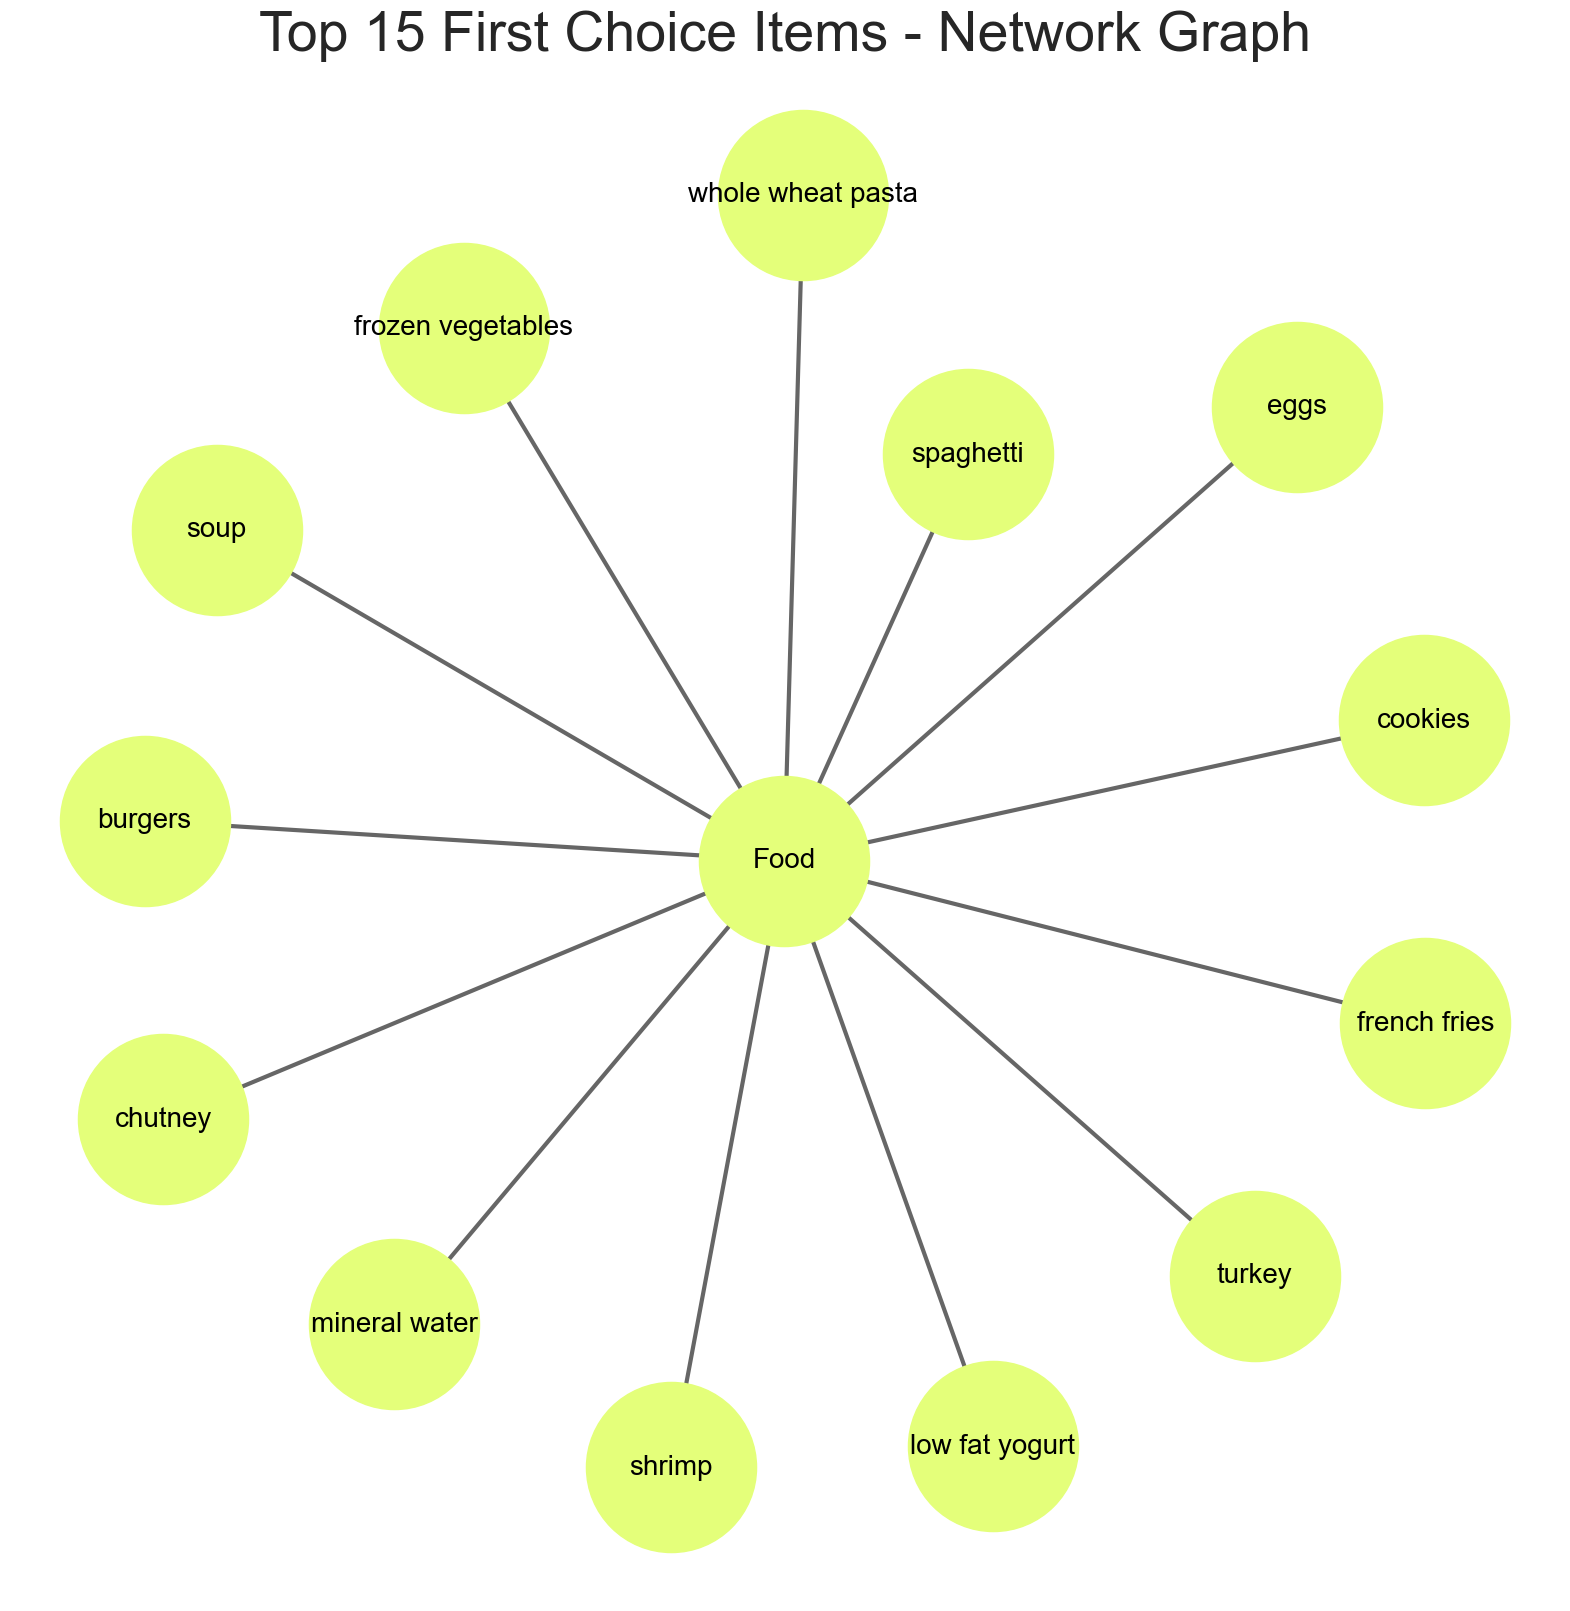

In [20]:
# TODO: Create Network Graph of Top 15 First Choices
# This shows the most common items customers pick FIRST

# Step 1: Add a category column to group items
data['food'] = 'Food'

# Step 2: Get top 15 first choices (column 0 contains first items)
# truncate(before=-1, after=15) gets rows from start to row 15
food = data.truncate(before=-1, after=15)

# Step 3: Create network graph using NetworkX
# from_pandas_edgelist creates edges from dataframe
# source='food' means all nodes connect to 'Food' center
# target=0 means connecting to items in column 0
food_network = nx.from_pandas_edgelist(food, 
                                       source='food', 
                                       target=0, 
                                       edge_attr=True)

# Step 4: Visualize the network
plt.rcParams['figure.figsize'] = (20, 20)

# Calculate node positions using spring layout
pos = nx.spring_layout(food_network, k=0.5, iterations=50)

# Create color palette
color = plt.cm.Wistia(np.linspace(0, 15, 1))

# Draw nodes (circles)
nx.draw_networkx_nodes(food_network, pos, 
                       node_size=15000, 
                       node_color=color)

# Draw edges (connecting lines)
nx.draw_networkx_edges(food_network, pos, 
                       width=3, 
                       alpha=0.6, 
                       edge_color='black')

# Draw labels (item names)
nx.draw_networkx_labels(food_network, pos, 
                        font_size=20, 
                        font_family='sans-serif')

plt.axis('off')
plt.grid()
plt.title('Top 15 First Choice Items - Network Graph', fontsize=40)
plt.show()

---

## Task 2: Data Preprocessing

### Understanding the Data Format

Our current data is in **horizontal format** where each row is a transaction. For Apriori algorithm, we need to convert it to a **binary matrix** (also called **basket format**) where:
- Each row is a transaction
- Each column is an item
- Values are True/False (or 1/0) indicating if an item was purchased in that transaction

**Example**:
```
Original Format:
Transaction 1: [milk, bread, butter]
Transaction 2: [bread, eggs]

Binary Format:
           milk  bread  butter  eggs
Trans 1    True  True   True    False
Trans 2    False True   False   True
```

### Task 2.1: Convert to List of Transaction

Convert the DataFrame to a list of lists, where each inner list contains items from one transaction.

**Steps**:
1. Iterate through each row of the DataFrame
2. Remove NaN values from each row
3. Convert to a list
4. Store all transaction lists

In [21]:
# TODO: Convert to list of transactions
transactions = []
for i in range(len(data)):
    # Get all items in this row, removing NaN values
    transaction = [item for item in data.values[i] if pd.notna(item)]
    transactions.append(transaction)


In [22]:
# Display first 5 transactions to verify
print("First 5 transactions:")
for i, trans in enumerate(transactions[:5]):
    print(f"Transaction {i+1}: {trans}")


First 5 transactions:
Transaction 1: ['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil', 'Food']
Transaction 2: ['burgers', 'meatballs', 'eggs', 'Food']
Transaction 3: ['chutney', 'Food']
Transaction 4: ['turkey', 'avocado', 'Food']
Transaction 5: ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'Food']


### Task 2.2: Create Binary Matrix

Use `TransactionEncoder` from mlxtend to convert the list of transactions to a binary matrix.

**Steps**:
1. Initialize TransactionEncoder
2. Fit and transform the transactions
3. Convert to a DataFrame
4. Display the shape and first few rows

In [24]:
# TODO: Create binary matrix using TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_array, columns=te.columns_)


In [25]:
# Display information about the basket
print(f"Basket shape: {basket.shape}")
print(f"Number of unique items: {len(basket.columns)}")
print("\nFirst 10 rows and 10 columns:")
basket.iloc[:10, :10]


Basket shape: (7501, 121)
Number of unique items: 121

First 10 rows and 10 columns:


,asparagus,Food,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea
0,False,True,True,True,False,True,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False
3,False,True,False,False,False,True,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False
6,False,True,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False


---

## Task 3: Apriori Algorithm

### Task 3.1: Find Frequent Itemsets

Apply the Apriori algorithm to find frequent itemsets with a minimum support of **0.003** (0.3%).

**Why 0.003?**
- Support = 0.003 means the itemset appears in at least 0.3% of transactions
- For 7501 transactions: 0.003 × 7501 ≈ 23 transactions
- This is a reasonable threshold to find meaningful patterns without too many rare items

**Hint**: Use `apriori(basket, min_support=0.003, use_colnames=True)`

In [27]:
# TODO: Apply Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.003 , use_colnames=True)

print("="*60)
print("APRIORI ALGORITHM RESULTS")
print("="*60)
print(f"\nTotal frequent itemsets found: {len(frequent_itemsets)}")
print(f"Minimum support threshold: 0.003 (0.3%)")
print(f"This means itemsets appear in at least {int(0.003 * len(basket))} transactions")

print("\nTop 10 frequent itemsets by support:")
display(frequent_itemsets.sort_values('support', ascending=False).head(10))


APRIORI ALGORITHM RESULTS

Total frequent itemsets found: 2887
Minimum support threshold: 0.003 (0.3%)
This means itemsets appear in at least 22 transactions

Top 10 frequent itemsets by support:


,support,itemsets
0,1.000000,(Food)
70,0.238368,(mineral water)
185,0.238368,"(mineral water, Food)"
35,0.179709,(eggs)
150,0.179709,"(Food, eggs)"
212,0.174110,"(spaghetti, Food)"
97,0.174110,(spaghetti)
156,0.170911,"(french fries, Food)"
41,0.170911,(french fries)
24,0.163845,(chocolate)


In [28]:
# Display statistics about frequent itemsets
print(f"Total frequent itemsets found: {len(frequent_itemsets)}")
print("\nTop 10 frequent itemsets by support:")
frequent_itemsets.sort_values('support', ascending=False).head(10)


Total frequent itemsets found: 2887

Top 10 frequent itemsets by support:


,support,itemsets
0,1.000000,(Food)
70,0.238368,(mineral water)
185,0.238368,"(mineral water, Food)"
35,0.179709,(eggs)
150,0.179709,"(Food, eggs)"
212,0.174110,"(spaghetti, Food)"
97,0.174110,(spaghetti)
156,0.170911,"(french fries, Food)"
41,0.170911,(french fries)
24,0.163845,(chocolate)


### Task 3.2: Analyze Itemset Lengths

Calculate and visualize:
1. How many itemsets of each length were found?
2. Create a bar chart showing the distribution

**Hint**: The length of an itemset can be found using `.apply(lambda x: len(x))`

In [29]:
# TODO: Calculate itemset lengths
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))


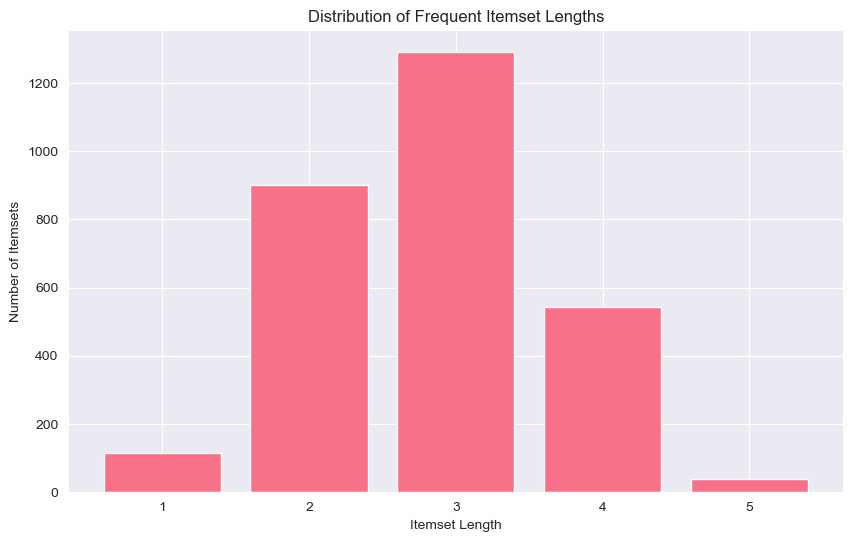

In [30]:
# TODO: Visualize itemset length distribution
length_counts = frequent_itemsets['length'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(length_counts.index, length_counts.values)
plt.xlabel('Itemset Length')
plt.ylabel('Number of Itemsets')
plt.title('Distribution of Frequent Itemset Lengths')
plt.xticks(length_counts.index)
plt.show()


### Task 3.3: Generate Association Rules

Generate association rules from the frequent itemsets using:
- Minimum confidence = **0.20** (20%)
- Metric = "lift"

**Interpretation**:
- Confidence = 0.20 means: "If someone buys item A, there's at least 20% chance they also buy item B"
- Lift metric helps us find rules where items are more likely to be bought together than by chance

**Hint**: Use `association_rules(frequent_itemsets, metric="lift", min_threshold=0.20)`

In [32]:
# TODO: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.20)


In [33]:
# Display rule statistics
print(f"Total association rules found: {len(rules)}")
print("\nColumns in rules DataFrame:")
print(rules.columns.tolist())
print("\nFirst 5 rules:")
rules.head()


Total association rules found: 18270

Columns in rules DataFrame:
['antecedents', 'consequents', 'antecedent support', 'consequent support', 'support', 'confidence', 'lift', 'representativity', 'leverage', 'conviction', 'zhangs_metric', 'jaccard', 'certainty', 'kulczynski']

First 5 rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Food),(almonds),1.000000,0.020397,0.020397,0.020397,1.0,1.0,0.0,1.0,0.0,0.020397,0.0,0.510199
1,(almonds),(Food),0.020397,1.000000,0.020397,1.000000,1.0,1.0,0.0,inf,0.0,0.020397,0.0,0.510199
2,(antioxydant juice),(Food),0.008932,1.000000,0.008932,1.000000,1.0,1.0,0.0,inf,0.0,0.008932,0.0,0.504466
3,(Food),(antioxydant juice),1.000000,0.008932,0.008932,0.008932,1.0,1.0,0.0,1.0,0.0,0.008932,0.0,0.504466
4,(asparagus),(Food),0.004666,1.000000,0.004666,1.000000,1.0,1.0,0.0,inf,0.0,0.004666,0.0,0.502333


---

## Task 4: Rule Analysis and Interpretation

### Task 4.1: Find Top Rules by Lift

Display the **top 10 rules** with the highest lift values.

**What is Lift?**
- Lift > 1: Items are positively associated (bought together more often than expected)
- Lift = 1: Items are independent (no association)
- Lift < 1: Items are negatively associated (rarely bought together)

**Hint**: Use `.sort_values('lift', ascending=False)`

In [35]:
# TODO: Find top 10 rules by lift
top_lift_rules = rules.sort_values('lift', ascending=False).head(10)
top_lift_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


,antecedents,consequents,support,confidence,lift
16982,"(mineral water, milk)","(frozen vegetables, soup)",0.003066,0.063889,7.987176
16983,"(frozen vegetables, soup)","(mineral water, milk)",0.003066,0.383333,7.987176
17948,"(frozen vegetables, Food, soup)","(mineral water, milk)",0.003066,0.383333,7.987176
17952,"(mineral water, Food, milk)","(frozen vegetables, soup)",0.003066,0.063889,7.987176
17961,"(mineral water, milk)","(frozen vegetables, Food, soup)",0.003066,0.063889,7.987176
17957,"(frozen vegetables, soup)","(mineral water, Food, milk)",0.003066,0.383333,7.987176
17918,"(frozen vegetables, olive oil, Food)","(mineral water, milk)",0.003333,0.294118,6.128268
17927,"(frozen vegetables, olive oil)","(mineral water, Food, milk)",0.003333,0.294118,6.128268
16969,"(frozen vegetables, olive oil)","(mineral water, milk)",0.003333,0.294118,6.128268
16968,"(mineral water, milk)","(frozen vegetables, olive oil)",0.003333,0.069444,6.128268


### Task 4.2: Find Top Rules by Confidence

Display the **top 10 rules** with the highest confidence values.

**What is Confidence?**
- Confidence measures the reliability of the rule
- Confidence = 0.80 means: "80% of people who buy A also buy B"
- High confidence rules are useful for product recommendations

In [37]:
# TODO: Find top 10 rules by confidence
top_confidence_rules = rules.sort_values('confidence', ascending=False).head(10)
top_confidence_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


,antecedents,consequents,support,confidence,lift
2306,"(burgers, light mayo)",(Food),0.003333,1.0,1.0
15535,"(mineral water, ground beef, whole wheat rice)",(Food),0.003866,1.0,1.0
6141,"(olive oil, soup)",(Food),0.008932,1.0,1.0
4077,"(escalope, green tea)",(Food),0.008932,1.0,1.0
6135,"(olive oil, shrimp)",(Food),0.008132,1.0,1.0
6128,"(olive oil, salmon)",(Food),0.005733,1.0,1.0
4082,"(ground beef, escalope)",(Food),0.008266,1.0,1.0
6122,"(pepper, olive oil)",(Food),0.003200,1.0,1.0
18122,"(mineral water, ground beef, spaghetti, pancakes)",(Food),0.003066,1.0,1.0
6116,"(pancakes, olive oil)",(Food),0.010799,1.0,1.0


### Task 4.3: Visualize Support vs Confidence

Create a scatter plot showing the relationship between support and confidence for all rules.
Color the points based on lift values.

**Interpretation**:
- Top-right corner: High support AND high confidence (best rules!)
- Color intensity shows lift (darker = stronger association)

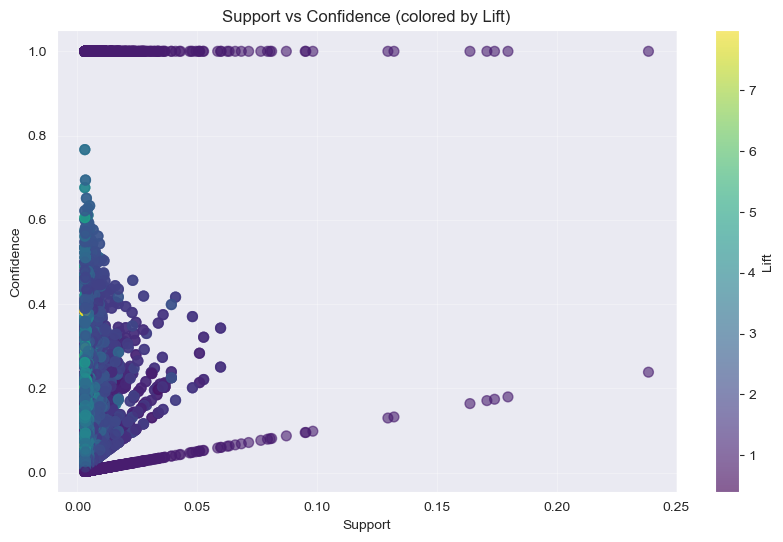

In [39]:
# TODO: Create scatter plot of Support vs Confidence
plt.figure(figsize=(10, 6))
scatter = plt.scatter(rules['support'], rules['confidence'], 
                      c=rules['lift'], cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence (colored by Lift)')
plt.grid(True, alpha=0.3)
plt.show()


### Task 4.4: Filter and Interpret Strong Rules

Find **strong rules** that meet ALL of the following criteria:
- Lift > 3.0 (strong positive association)
- Confidence > 0.30 (at least 30% reliability)
- Support > 0.001 (appears in at least 0.1% of transactions)

Display these rules and provide business interpretations for the top 5.

In [41]:
# TODO: Filter strong rules
strong_rules = rules[(rules['lift'] > 3.0) & 
                     (rules['confidence'] > 0.30) & 
                     (rules['support'] > 0.001)]

strong_rules = strong_rules.sort_values('lift', ascending=False)
print(f"Found {len(strong_rules)} strong rules")
strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


Found 210 strong rules


,antecedents,consequents,support,confidence,lift
16983,"(frozen vegetables, soup)","(mineral water, milk)",0.003066,0.383333,7.987176
17948,"(frozen vegetables, Food, soup)","(mineral water, milk)",0.003066,0.383333,7.987176
17957,"(frozen vegetables, soup)","(mineral water, Food, milk)",0.003066,0.383333,7.987176
16268,"(mineral water, whole wheat pasta)","(olive oil, Food)",0.003866,0.402778,6.115863
9399,"(mineral water, whole wheat pasta)",(olive oil),0.003866,0.402778,6.115863
16264,"(mineral water, Food, whole wheat pasta)",(olive oil),0.003866,0.402778,6.115863
15634,"(tomato sauce, spaghetti, Food)",(ground beef),0.003066,0.489362,4.980600
15637,"(tomato sauce, spaghetti)","(ground beef, Food)",0.003066,0.489362,4.980600
9129,"(tomato sauce, spaghetti)",(ground beef),0.003066,0.489362,4.980600
1007,(pasta),(escalope),0.005866,0.372881,4.700812


**TODO: Write your interpretation here**

Example interpretation for rule: {eggs} → {mineral water}
- Support: This combination appears in X% of all transactions
- Confidence: X% of customers who buy eggs also buy mineral water
- Lift: These items are bought together X times more often than if they were independent
- **Business Recommendation**: Place eggs near mineral water in the store, or create a bundle offer

Write similar interpretations for the top 5 strong rules:

1. Rule 1: [Your interpretation]
2. Rule 2: [Your interpretation]
3. Rule 3: [Your interpretation]
4. Rule 4: [Your interpretation]
5. Rule 5: [Your interpretation]

---

## Task 5: Advanced Visualization

### Task 5.1: Create a Heatmap of Item Associations

Create a heatmap showing the lift values between pairs of items.

**Steps**:
1. Filter rules to only include 1-item antecedents and 1-item consequents
2. Select top 15 items by frequency
3. Create a pivot table with lift values
4. Visualize as a heatmap

**Interpretation**:
- Darker colors = stronger positive associations
- Lighter colors = weaker or negative associations

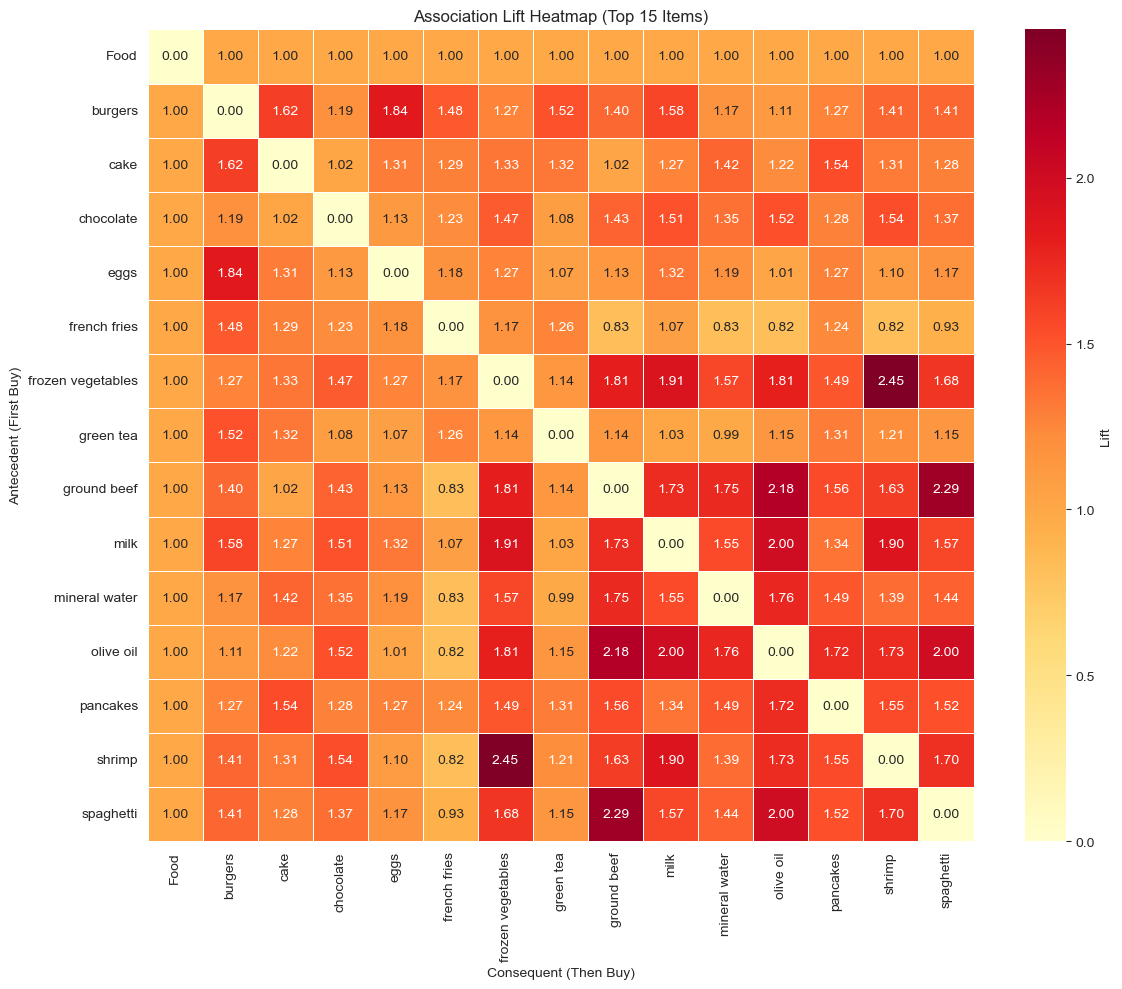

In [43]:
# TODO: Create heatmap of item associations
# Step 1: Filter to 1-item rules
rules_1item = rules[(rules['antecedents'].apply(lambda x: len(x)) == 1) &
                    (rules['consequents'].apply(lambda x: len(x)) == 1)].copy()

# Step 2: Extract item names
rules_1item['antecedent'] = rules_1item['antecedents'].apply(lambda x: list(x)[0])
rules_1item['consequent'] = rules_1item['consequents'].apply(lambda x: list(x)[0])

# Step 3: Get top items (based on frequency in rules)
all_items_in_rules = list(rules_1item['antecedent']) + list(rules_1item['consequent'])
top_items = pd.Series(all_items_in_rules).value_counts().head(15).index

# Step 4: Filter rules for top items
rules_top = rules_1item[(rules_1item['antecedent'].isin(top_items)) & 
                        (rules_1item['consequent'].isin(top_items))]

# Step 5: Create pivot table
pivot = rules_top.pivot_table(values='lift', 
                              index='antecedent', 
                              columns='consequent', 
                              fill_value=0)

# Step 6: Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='YlOrRd', 
            linewidths=0.5, cbar_kws={'label': 'Lift'})
plt.title('Association Lift Heatmap (Top 15 Items)')
plt.xlabel('Consequent (Then Buy)')
plt.ylabel('Antecedent (First Buy)')
plt.tight_layout()
plt.show()


### Task 5.2: Visualize Rule Network

Create a network graph showing the relationships between items in strong association rules.

**Requirements**:
- Use NetworkX library
- Show top 20 rules by lift
- Size nodes by frequency
- Color edges by lift value

**Hint**: You may need to install networkx: `!pip install networkx`

In [44]:
# Optional: Install networkx
!pip install networkx

Defaulting to user installation because normal site-packages is not writeable


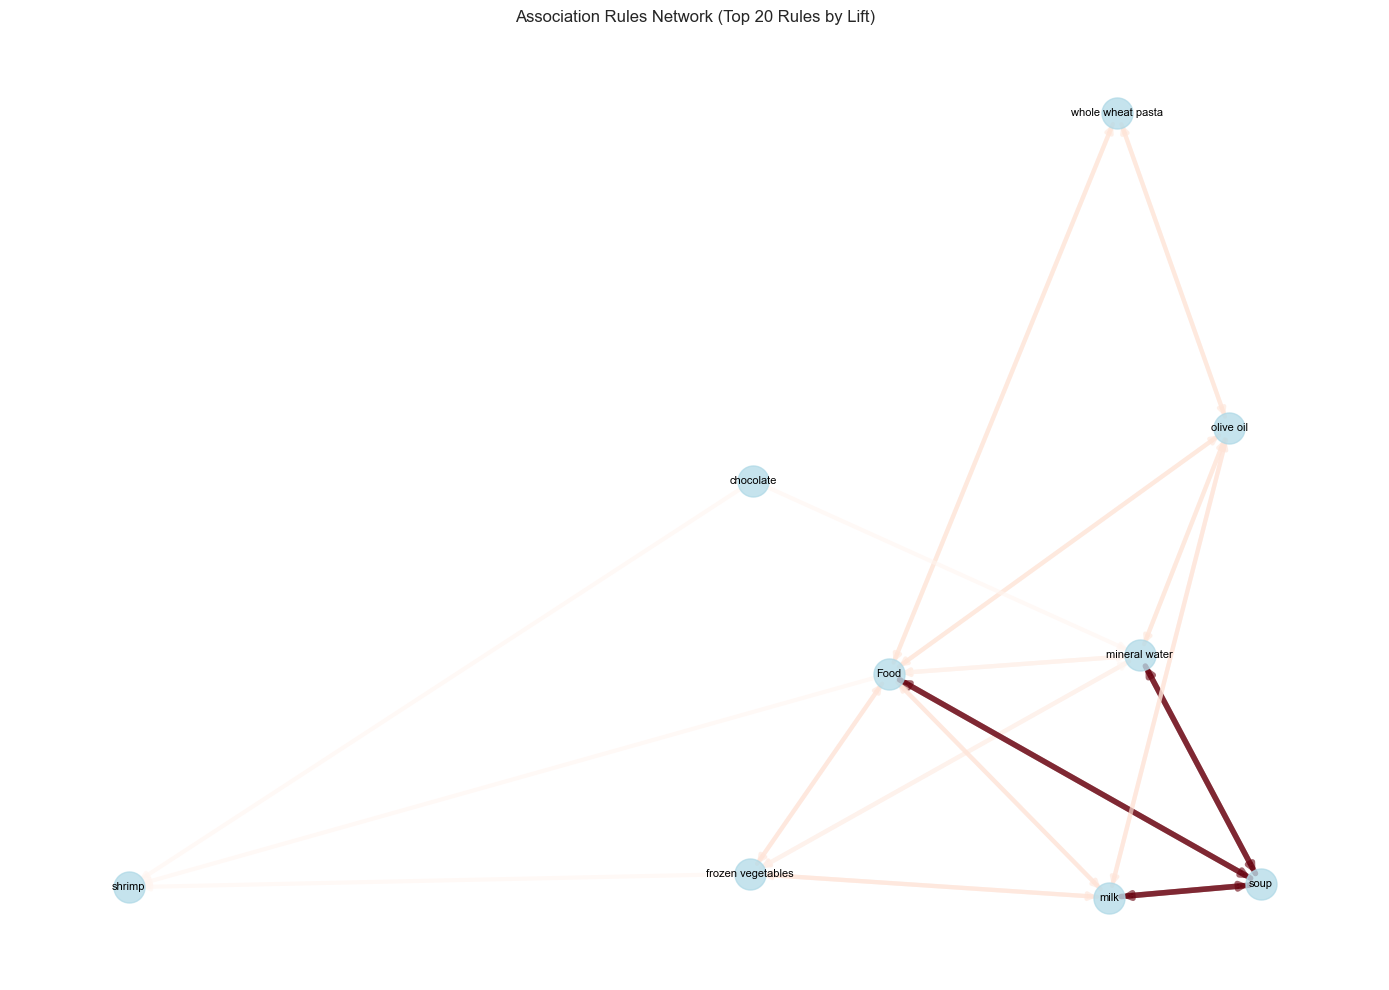

In [45]:
# TODO (BONUS): Create network graph
import networkx as nx

# # Get top 20 rules
top_rules = rules.sort_values('lift', ascending=False).head(20)

# # Create graph
G = nx.DiGraph()

# # Add edges
for _, row in top_rules.iterrows():
    for ant in row['antecedents']:
        for cons in row['consequents']:
            G.add_edge(ant, cons, weight=row['lift'])

# # Plot
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5, iterations=50)

# # Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue', alpha=0.7)

# # Draw edges with varying thickness based on lift
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
nx.draw_networkx_edges(G, pos, width=[w*0.5 for w in weights], 
                       alpha=0.6, edge_color=weights, edge_cmap=plt.cm.Reds)

# # Draw labels
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Association Rules Network (Top 20 Rules by Lift)')
plt.axis('off')
plt.tight_layout()
plt.show()


---

## Summary and Key Takeaways

### What We Learned:

1. **Association Rules Mining** helps discover hidden patterns in transaction data
2. **Support** measures how often itemsets appear together
3. **Confidence** measures the reliability of association rules
4. **Lift** measures how much more likely items are bought together vs. independently
5. **Apriori Algorithm** efficiently finds frequent itemsets using the apriori principle


### Real-World Applications:

1. **Retail**: Product placement, bundle offers, inventory management
2. **E-commerce**: Recommendation systems ("Customers who bought this also bought...")
3. **Healthcare**: Drug interaction analysis, treatment patterns
4. **Finance**: Credit card fraud detection, cross-selling financial products
5. **Telecommunications**: Service bundling, customer churn prevention

### Important Considerations:

1. **Threshold Selection**: Support and confidence thresholds affect results significantly
2. **Interpretation**: High lift doesn't always mean practical usefulness
3. **Causation vs. Correlation**: Association doesn't imply causation
4. **Domain Knowledge**: Business context is crucial for interpreting results

---

## Submission Guidelines

### What to Submit:
1. This completed Jupyter notebook with all code cells executed
2. All visualizations should be visible in the notebook
3. Written interpretations and recommendations

---

### Questions or Need Help?

If you have questions:
1. Re-read the explanations and hints in each section
2. Check the example code provided
3. Discuss with your classmates (but write your own code!)
4. Ask the instructor during lab hours

**Good luck! 🎯**